TIME SERIES PREDICTION ABOUT AKBANK SHARE
DATA PREPROCCESSING

1-DATA READING AND REDUCING THE NUMBER

In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df=pd.read_csv('AKBANK.csv')
df_april=pd.read_csv('AKBNK-nisan-mayıs.csv')
print(df.head(5),'\n')
print(f"Shape of this dataframe is: {df.shape}")


        Tarih  Şimdi Açılış Yüksek  Düşük     Hac.  Fark %
0  26.06.2023  20,42  20,54  20,78  20,24  168,99M   3,18%
1  23.06.2023  19,79  19,44  20,14  19,44  255,23M   3,13%
2  22.06.2023  19,19  19,30  19,55  18,60  439,66M  -0,62%
3  21.06.2023  19,31  19,22  19,39  18,93  171,88M   1,42%
4  20.06.2023  19,04  18,51  19,23  18,39  214,51M   2,86% 

Shape of this dataframe is: (21, 7)


At first we check if dataframe is readable and the shape of dataframe. This first dataset consist of 21 row and 5 columns.
This is a small number to evaluate, so add also a few past months data also.

In [130]:
df=pd.concat([df, df_april])
dates=list(df['Tarih'])
dates#List of total timestamps AKBANK Share data.

['26.06.2023',
 '23.06.2023',
 '22.06.2023',
 '21.06.2023',
 '20.06.2023',
 '19.06.2023',
 '16.06.2023',
 '15.06.2023',
 '14.06.2023',
 '13.06.2023',
 '12.06.2023',
 '09.06.2023',
 '08.06.2023',
 '07.06.2023',
 '06.06.2023',
 '05.06.2023',
 '02.06.2023',
 '01.06.2023',
 '31.05.2023',
 '30.05.2023',
 '29.05.2023',
 '30.05.2023',
 '29.05.2023',
 '26.05.2023',
 '25.05.2023',
 '24.05.2023',
 '23.05.2023',
 '22.05.2023',
 '18.05.2023',
 '17.05.2023',
 '16.05.2023',
 '15.05.2023',
 '12.05.2023',
 '11.05.2023',
 '10.05.2023',
 '09.05.2023',
 '08.05.2023',
 '05.05.2023',
 '04.05.2023',
 '03.05.2023',
 '02.05.2023',
 '28.04.2023',
 '27.04.2023',
 '26.04.2023',
 '25.04.2023',
 '24.04.2023',
 '20.04.2023',
 '19.04.2023',
 '18.04.2023',
 '17.04.2023',
 '14.04.2023',
 '13.04.2023',
 '12.04.2023',
 '11.04.2023',
 '10.04.2023',
 '07.04.2023',
 '06.04.2023',
 '05.04.2023',
 '04.04.2023',
 '03.04.2023',
 '31.03.2023',
 '30.03.2023']

2-DATA CLEANING-NULL CHECK

In [131]:
df.info()#This check is required to operate columns data, as ,f it is not compatiple type we cann't do numerical operations especially.

<class 'pandas.core.frame.DataFrame'>
Index: 62 entries, 0 to 40
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Tarih   62 non-null     object
 1   Şimdi   62 non-null     object
 2   Açılış  62 non-null     object
 3   Yüksek  62 non-null     object
 4   Düşük   62 non-null     object
 5   Hac.    62 non-null     object
 6   Fark %  62 non-null     object
dtypes: object(7)
memory usage: 3.9+ KB


There is no null cell in datasets.

3-DATA CLEANING-DUPLICATED ROWS

In [132]:
df.duplicated()
x=0
y=0

for i in df.duplicated():
    y=y+1
    x=x+1
    if i==True:
        print(f"{x} is duplicated")
    elif(y==len(df.duplicated())):
        print('None of the rows are duplicated.')
    else:
        continue

22 is duplicated
23 is duplicated
None of the rows are duplicated.


Note: Duplicated row is regulated manually from csv file.

4-COLUMNS LABEL RENAME

In [133]:
df=df.reindex(columns=['Tarih','Şimdi','Açılış','Yüksek','Düşük','Hac.','Fark %'])
df.rename(columns = {'Tarih':'Date','Şimdi':'Now','Açılış':'Start','Yüksek':'Heigh','Düşük':'Low','Hac.':'Volume','Fark %':'Difference'}, inplace = True)
df.head()

,Date,Now,Start,Heigh,Low,Volume,Difference
0,26.06.2023,"20,42","20,54","20,78","20,24","168,99M","3,18%"
1,23.06.2023,"19,79","19,44","20,14","19,44","255,23M","3,13%"
2,22.06.2023,"19,19","19,30","19,55","18,60","439,66M","-0,62%"
3,21.06.2023,"19,31","19,22","19,39","18,93","171,88M","1,42%"
4,20.06.2023,"19,04","18,51","19,23","18,39","214,51M","2,86%"


And now t is translated into turkish.

Now we need to get Date_sold column to index axis to recurrent neural networks. AS current type is object we change it to datetime type.

5-REINDEXING ROWS

In [134]:
if df['Date'].dtypes!='datetime64':
    df['Date']=pd.to_datetime(df['Date'])
    print('Turned into datetime',df['Date'].dtypes)
    print(df.head())
else:
    print('Already datetime')

Turned into datetime datetime64[ns]
        Date    Now  Start  Heigh    Low   Volume Difference
0 2023-06-26  20,42  20,54  20,78  20,24  168,99M      3,18%
1 2023-06-23  19,79  19,44  20,14  19,44  255,23M      3,13%
2 2023-06-22  19,19  19,30  19,55  18,60  439,66M     -0,62%
3 2023-06-21  19,31  19,22  19,39  18,93  171,88M      1,42%
4 2023-06-20  19,04  18,51  19,23  18,39  214,51M      2,86%


C:\Users\Talha\AppData\Local\Temp\ipykernel_1672\794571728.py:2: UserWarning: Parsing dates in %d.%m.%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date']=pd.to_datetime(df['Date'])


In [135]:
df.head()
df=df.set_index('Date')
#We assign it into new variable to update dataframe. 

6-Column Type Rearranging
We use this dataframe to predict next numerical variables.
To turn it into float type, the string keys first has to be excluded.
So we do this. And sort rows using Datetime index.

In [136]:
df['Volume']= df["Volume"].apply(lambda x: x.split("M")[0])
df['Difference']= df["Difference"].apply(lambda x: x.split('%')[0])
df = df.applymap(lambda x: x.replace(',', '.'))
df=df.sort_index()
df

,Now,Start,Heigh,Low,Volume,Difference
Date,,,,,,
2023-03-30,16.70,16.98,17.25,16.61,126.04,-1.30
2023-03-31,16.94,16.49,16.98,16.20,127.23,1.44
2023-04-03,17.02,16.82,17.10,16.45,108.14,0.47
2023-04-04,17.36,17.01,17.39,16.93,97.67,2.00
2023-04-05,16.86,17.36,17.46,16.86,76.79,-2.88
...,...,...,...,...,...,...
2023-06-20,19.04,18.51,19.23,18.39,214.51,2.86
2023-06-21,19.31,19.22,19.39,18.93,171.88,1.42
2023-06-22,19.19,19.30,19.55,18.60,439.66,-0.62


7-DATA VISUALIZATION

Data visualization is an important step for data preprocessing. Because given dataset may contain exact changes because of extraordinary effect, so this can be understood by graphs.

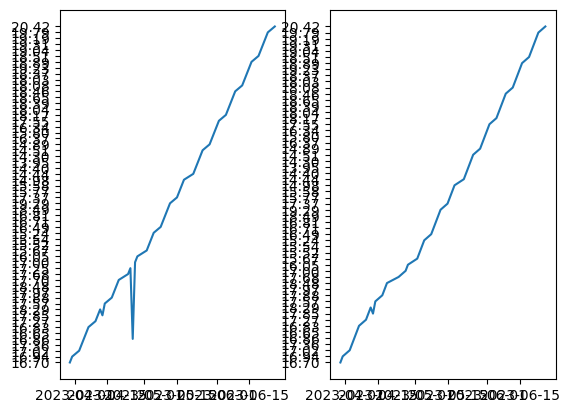

In [137]:

plt.title("Price Change")
plt.xlabel("Date")
plt.ylabel("Price")
plt.tick_params(axis='x', which='both', bottom=True, top=True)
plt.subplot(1, 2, 1)
plt.plot(df['Now'])
df=df.drop([pd.to_datetime('2023-04-20'),pd.to_datetime('2023-04-25'),pd.to_datetime('2023-04-26')])
plt.subplot(1, 2, 2)
plt.plot(df['Now'])

So we see that there is a extraordinary decrease in share the date between 20/04- 26/04. And we drop this rows from dataset.

8-DATA CLASSSFYING

We have independent and dependent variables for prediction. 
As we have more than one variable this time series prediction(TSP) is called as multivariate time series.

In [138]:
#DATA CLASSIFYING FOR INDEPENDENT AND DEPENDENT VARIABLE
ind_col=['Start','Heigh','Low']
ind_df=df[ind_col].astype(float)
dep_df=df['Now'].astype(float)
ind_df.head(6)
len(ind_df)
#We seperate dataframe by independent variables and ddependent variables for TSP.
#And make all columns float for numerical operatio.

59

9-DATA NORMALIZATION

In [139]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
ind_df_scaled = scaler.fit_transform(ind_df)
dep_df_scaled = scaler.fit_transform(dep_df.values.reshape(-1, 1))
trainX = []
trainY = []

n_future = 1   # Number of days we want to look into the future based on the past days.
n_past = 4  # Number of past days we want to use to predict the future.

#Reformat input data into a shape: (n_samples x timesteps x n_features)
for i in range(n_past, len(ind_df) - n_future +2):#(4,21,)
    if i==(len(df)-n_future+1):
        trainX.append(ind_df_scaled[i - n_past:i, 0:ind_df.shape[1]])
    else:
        trainX.append(ind_df_scaled[i - n_past:i, 0:ind_df.shape[1]])
        trainY.append(dep_df_scaled[i + n_future - 1:i + n_future, 0])
        
trainX, trainY = np.array(trainX), np.array(trainY)
trainX_train=trainX[0:(len(trainX)-1)]
print('trainX shape == {}.'.format(trainX_train.shape))
print('trainY shape == {}.'.format(trainY.shape))
#trainX

trainX shape == (55, 4, 3).
trainY shape == (55, 1).


This step is used for data grouping by independent and dependent variable. We make all data to appropriate by past n timestamps independent variables for next dependent variable.

9-LSTM MODEL BUILDING

In [140]:
from keras.models import Sequential
from keras.layers import LSTM, Dense,Dropout
#importing neccesary libraries
model = Sequential()
model.add(LSTM(units=50, activation='tanh',input_shape=(trainX_train.shape[1], trainX_train.shape[2]),return_sequences=True)) 
model.add(LSTM(units=40, activation='tanh',input_shape=(trainX_train.shape[1], trainX_train.shape[2]),return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(trainY.shape[1]))#Bu modelin çıktı katmanıdır. Çıkışta alıcağımız veri özellik sayısına eştleriz.

-The model predicts the next day using the previous 4 days. A sequential structure was created by adding two consecutive LSTM layers also.

-The Droput layer is used to cover the random data from the training layer. In this way, excessive compatibility of the data and interpolation-based estimation will be saved.(Overfitting)

The Dense layer determines the size of the output. The number of columns of a single dependent variable is given as input to the layer.

Units number and activation function is selected as most appropriate parameters based on this estimation aim.

10-MODEL COMPILATION

In [141]:
model.compile(optimizer='adam', loss='mean_squared_error')

This step is vital important as  key difference from simpleRNN units. The more long term dependencies for predict, loss value will get bigger in RNN model. But LSTM use a  multifunctional model structure to overcome about it.

With the simplest explanation it has a cell state and gate units to work only with useful data for the active timestamp and so the compliation step preserved from calculating unneccesary gradient calculation.


For more readme.md

MODEL TRAINING

Epoch 1/20
4/4 - 7s - loss: 0.2823 - val_loss: 0.6395 - 7s/epoch - 2s/step
Epoch 2/20
4/4 - 0s - loss: 0.1977 - val_loss: 0.4741 - 64ms/epoch - 16ms/step
Epoch 3/20
4/4 - 0s - loss: 0.1468 - val_loss: 0.3213 - 55ms/epoch - 14ms/step
Epoch 4/20
4/4 - 0s - loss: 0.0963 - val_loss: 0.1803 - 56ms/epoch - 14ms/step
Epoch 5/20
4/4 - 0s - loss: 0.0537 - val_loss: 0.0739 - 56ms/epoch - 14ms/step
Epoch 6/20
4/4 - 0s - loss: 0.0325 - val_loss: 0.0214 - 56ms/epoch - 14ms/step
Epoch 7/20
4/4 - 0s - loss: 0.0331 - val_loss: 0.0100 - 57ms/epoch - 14ms/step
Epoch 8/20
4/4 - 0s - loss: 0.0467 - val_loss: 0.0124 - 104ms/epoch - 26ms/step
Epoch 9/20
4/4 - 0s - loss: 0.0318 - val_loss: 0.0313 - 62ms/epoch - 15ms/step
Epoch 10/20
4/4 - 0s - loss: 0.0342 - val_loss: 0.0451 - 60ms/epoch - 15ms/step
Epoch 11/20
4/4 - 0s - loss: 0.0376 - val_loss: 0.0432 - 58ms/epoch - 14ms/step
Epoch 12/20
4/4 - 0s - loss: 0.0336 - val_loss: 0.0387 - 58ms/epoch - 14ms/step
Epoch 13/20
4/4 - 0s - loss: 0.0395 - val_loss: 0.05

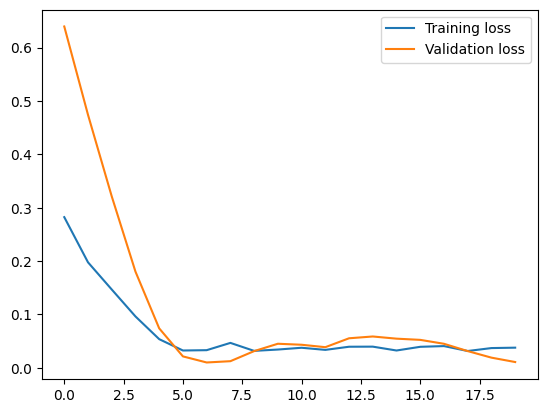

In [142]:
history = model.fit(trainX_train, trainY, epochs=20, batch_size=16, validation_split=0.1, verbose=2)
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()

MODEL PREDICTION

In [143]:
n_days_for_prediction=10
predict_dates=pd.date_range((ind_df.index)[-n_days_for_prediction],periods=n_days_for_prediction+1,freq='B')
predict_dates=predict_dates[1:]
prediction = model.predict(trainX[-n_days_for_prediction:]) 
prediction=scaler.inverse_transform(prediction)


1/1 [==============================] - 1s 843ms/step


COMPARISION
Bunlar ileri tarihli tahminleri yapmak için.

In [144]:
forecast_dates = []
i=0
for time_i in predict_dates:
    i=i+1
    if i==n_days_for_prediction:
        print(f'The predict now price for {time_i} is {prediction[i-1]} and real value is not known yet.')
    else:   
        forecast_dates.append(time_i.date())
        print(f'The predict now price for {time_i} is {prediction[i-1]} and real value is {df.at[time_i,"Now"]}')

The predict now price for 2023-06-14 00:00:00 is [18.641241] and real value is 18.37
The predict now price for 2023-06-15 00:00:00 is [18.588974] and real value is 19.23
The predict now price for 2023-06-16 00:00:00 is [18.548374] and real value is 18.89
The predict now price for 2023-06-19 00:00:00 is [18.620218] and real value is 18.51
The predict now price for 2023-06-20 00:00:00 is [18.81653] and real value is 19.04
The predict now price for 2023-06-21 00:00:00 is [18.94714] and real value is 19.31
The predict now price for 2023-06-22 00:00:00 is [18.98817] and real value is 19.19
The predict now price for 2023-06-23 00:00:00 is [18.952694] and real value is 19.79
The predict now price for 2023-06-26 00:00:00 is [19.08293] and real value is 20.42
The predict now price for 2023-06-27 00:00:00 is [19.357618] and real value is not known yet.


And the predicted price and real price shown below with figure.

Note: Real share value is 20.20 for 2023-06-27. 

DATA VISUALIZATION

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


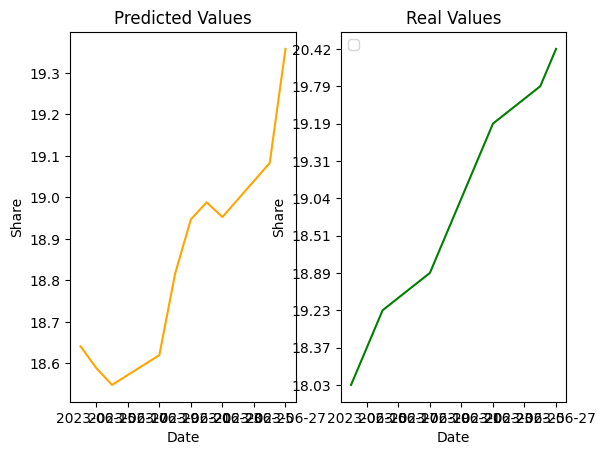

In [145]:
last_10=df.tail(10)['Now'].tolist()
plt.subplot(1,2,1)
plt.plot(predict_dates,prediction,color='orange')
plt.xlabel('Date')
plt.ylabel('Share')
plt.title('Predicted Values')
plt.subplot(1,2,2)
plt.plot(predict_dates,last_10,color='green')

plt.xlabel('Date')
plt.ylabel('Share')
plt.title('Real Values')

# Legendların gösterimi
plt.legend()

# Grafik gösterimi
plt.show()

